    Nama   : Orisam Lorensone Rumere
    Nim    : 09011981722131
    Kelas  : SK5A


# Tugas Kecerdasan Buatan (PENERAPAN METODE FUZZY SUGENO UNTUK MENENTUKAN HARGA JUAL SEPEDA MOTOR BEKAS) 

In [4]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [5]:
tahunmotor = ctrl.Antecedent(np.arange(2000,2018,1), 'tahunmotor')
kondisifisik = ctrl.Antecedent(np.arange(40,101,1), 'kondisifisik')
hargabeli = ctrl.Consequent(np.arange(15,150,1),'hargabeli')

tahunmotor, kondisifik, hargabeli, adalah input dan output yang akan di pakai sebagai masukan dan pengeluaran data.
1.tahunmotor di sini sebagai input atau masukan data di mana kita melihat dari tahun paling lama dan juga tahun paling baru untuk menentukan hargabeli.
2.kondisifisik di sini sebagai input atau masukan data di mana kita melihat dari kondisi motor kurang dan juga paling bagus untuk menentukan hargabeli.
3.hargabeli di sini sebagai uotput atau pengeluaran data di mana kita melihat dua input data di atas maka nantinya akan keluar sebagi harga beli atau aotput data, dari tahunmotor dan kondisifisik.


In [19]:
tahunmotor['lama'] = fuzz.trapmf(tahunmotor.universe, [1, 1, 2008,2012])
tahunmotor['agaklama'] = fuzz.trimf(tahunmotor.universe, [2008, 2012, 2016])
tahunmotor['baru'] = fuzz.trapmf(tahunmotor.universe, [2012, 2016, 2017, 2017])

kondisifisik['kurang'] = fuzz.trapmf(kondisifisik.universe, [1, 1, 50, 70])
kondisifisik['sedang'] = fuzz.trimf(kondisifisik.universe, [50, 70, 85])
kondisifisik['bagus'] = fuzz.trapmf(kondisifisik.universe, [70, 85, 100, 100])

hargabeli['murah'] = fuzz.trapmf(hargabeli.universe, [1, 15, 60, 75])
hargabeli['sedang'] = fuzz.trimf(hargabeli.universe, [60, 75, 100])
hargabeli['mahal'] = fuzz.trapmf(hargabeli.universe, [75, 100, 150, 150])

1.tahunmotor akan di bagi menjadi tiga himpunan fuzzy yaitu: lama, agaklama, baru.
>lama disini sebagai himpunan fuzzy tahunmotor, dan mengapa fuzz.trapmf karena trapesium pada grafik
>agaklama sebagai himpunan fuzzy tahunmotor, dan mengapa fuzz.trimf

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


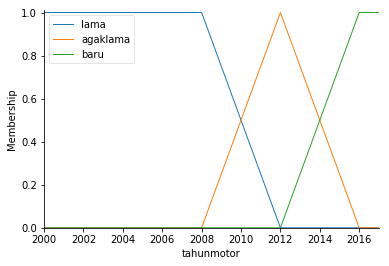

In [20]:
tahunmotor.view()

Pada variabel tahun motor (dinotasikan sebagai  ) akan dibagi menjadi 3 himpunan fuzzy, yaitu LAMA, AGAK LAMA, dan BARU. Himpunan fuzzy direpresentasikan dengan fungsi keanggotaan.                                                                                                                                         

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


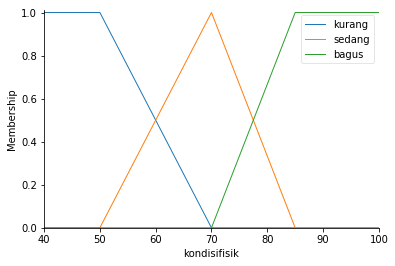

In [21]:
kondisifisik.view()

Pada variabel kondisi fisik (dinotasikan sebagai  ) akan dibagi menjadi 3 himpunan fuzzy, yaitu JELEK, SEDANG, dan BAGUS. Himpunan fuzzy direpresentasikan dengan fungsi.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


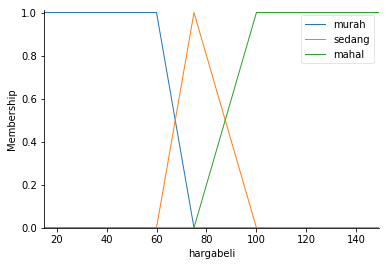

In [22]:
hargabeli.view()

Pada variabel harga beli (dinotasikan sebagai ) akan dibagi menjadi 3 himpunan fuzzy, yaitu MURAH, SEDANG, dan MAHAL. Himpunan fuzzy direpresentasikan dengan fungsi.

In [23]:
rule1 = ctrl.Rule(tahunmotor['lama'] & kondisifisik['kurang'] ,hargabeli['murah'])
rule2 = ctrl.Rule(tahunmotor['lama'] & kondisifisik['sedang'] ,hargabeli['murah'])
rule3 = ctrl.Rule(tahunmotor['lama'] & kondisifisik['bagus'] ,hargabeli['sedang'])

rule4 = ctrl.Rule(tahunmotor['agaklama'] & kondisifisik['kurang'] ,hargabeli['murah'])
rule5 = ctrl.Rule(tahunmotor['agaklama'] & kondisifisik['sedang'] ,hargabeli['sedang'])
rule6 = ctrl.Rule(tahunmotor['agaklama'] & kondisifisik['bagus'] ,hargabeli['sedang'])

rule7 = ctrl.Rule(tahunmotor['baru'] & kondisifisik['kurang'] ,hargabeli['murah'])
rule8 = ctrl.Rule(tahunmotor['baru'] & kondisifisik['sedang'] ,hargabeli['sedang'])
rule9 = ctrl.Rule(tahunmotor['baru'] & kondisifisik['bagus'] ,hargabeli['mahal'])

# RULE EVALUATION

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2ed26b801d0>)

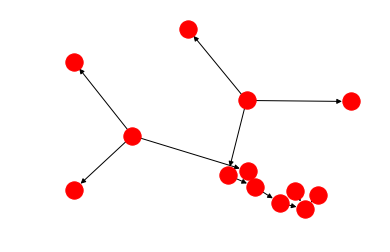

In [24]:
rule1.view()


menampilkan rules 1

## Mekanisme Inferensi

In [25]:
hargabeli_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4, rule5, rule6,rule7, rule8, rule9 ])

## Defuzzifikasi

In [26]:
tingkat = ctrl.ControlSystemSimulation(hargabeli_ctrl)

78.33333333333333


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


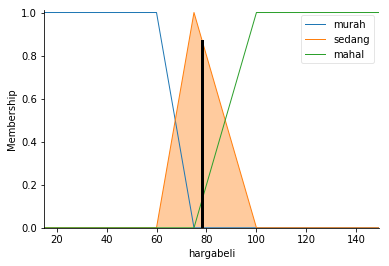

In [32]:
tingkat.input['tahunmotor'] = 2017
tingkat.input['kondisifisik'] = 70
tingkat.compute()
print (tingkat.output['hargabeli'])
hargabeli.view(sim=tingkat)

Di bagian terakhir ini adalah grafik untuk menejelaskan tentang harga dari produk atau motor yang akan kita jual. Dari gambar di atas kita dapat melihat harga beli, dengan melihat input yang telah kita buat yaitu: tahun motor dan kondisi fisik.

### Hitungan Manual

Soal

Hitunglah harga beli kendaraan jika input Tahun Motor 2017 dan kondisi fikiknya 70.

**1. Fuzzifikasi**

Metode Inferensi

**Tahun Motor**

- $\mu Baru[2017]=(\frac{2017-2017}{2017-2012})=\frac{0}{5}=0$ <br>

**Kondisi Fisik**

- $\mu Sedang[70]=(\frac{85-70}{85-50})=\frac{15}{35}=0.42$ <br>
- $\mu Bagus[70]=(\frac{70-70}{100-70})=\frac{0}{30}=0$ <br>

Rule Evaluation

IF Tahun Motor = Baru, AND Kondisi Fisik = Sedang, THEN Harga Beli = Sedang <br>
$\alpha 8 = \mu tahunmotor \bigcap \mu kondisifisik = min(\mu baru[2017], \mu sedang[70]) = min [0;0,42] = 0$

IF Tahun Motor = Baru, AND Kondisi Fisik = Bagus, THEN Harga Beli = Mahal <br>
$\alpha 9 = \mu tahunmotor \bigcap \mu kondisifisik = min(\mu baru[2017], \mu bagus[70]) = min [0;0] = 0$

**2. Agregasi dan Defuzzifikasi**

Rumus

$$
Hasil = \frac {\sum XiAi}{\sum Ai}
$$

Mencari nilai A1

$
A1 = \frac {1}{2} (P x L) \\
A1 = 0.5 (15 x 0.42) \\ 
A1 = 3.15 \\
$

Mencari nilai A2

$
A2 = P x L \\
A2 = (15) x (0.42) \\ 
A2 = 6.3 \\
$

Mencari nilai A3

$
A1 = \frac {1}{2} (P x L) \\
A1 = 0.5 (10 x 0.42) \\ 
A1 = 2.1 \\
$

Mencari nilai X1

$
X1 = a +\frac{2}{3} (b - a) \\
X1 = 60 + \frac{2}{3} (75 - 60) \\ 
X1 = 60 + \frac{30}{3} \\
X1 = 60 +  10\\
X1 = 70\\
$

Mencari nilai X2

$
X2 = \frac{1}{2}(b+a) \\
X2 = \frac{1}{2}(90 + 75) \\ 
X2 = \frac{165}{2} \\
X2 = 82.5\\
$

Mencari nilai X3

$
X3 = a +\frac{1}{3} (b - a) \\
X3 = 90 + \frac{1}{3} (100 - 90) \\ 
X3 = 90 + \frac{10}{3} \\
X3 = 90 +  3.33\\
X3 = 93.33\\
$

$$Hasil = \frac {\sum XiAi}{\sum Ai}$$

$$Hasil = \frac {(X1 \times A1)+(X2 \times A2)+(X3 \times A3)}{A1+A2+A3}$$

$$Hasil = \frac {(70 \times 3.15)+(82.5 \times 6.3)+(93.3 \times 2.1)}{3.15+6.3+2.1}$$

$$Hasil = \frac {220.5+519.75+195.993}{11.55}$$

$$Hasil = \frac {936.243}{11.55}$$

$$Hasil = 81.06$$

**Analisa**

Hasil yang didapatkan di perhitungan manual adalah senilai 81.06 sedangkan hasil yang di dapatkan di python adalah senilai 78.3333, ada jarak senilai 2.733

Jarak yang didapatkan mungkin diakibatkan perhitungan manual